# **POKEMON ANALYSIS**

**Data on more than 800 Pokemon from all 7 Generations.**

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

**Dictionary**
The data as described by Myles O'Neill is:

#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

The data for this table has been acquired from several different sites, including:

pokemon.com
pokemondb
bulbapedia
One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.


In [332]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [333]:
#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [334]:
#Fake News Dataset
ATT_FILE= "/gdrive/My Drive/pokemon/pokemondataset.csv"

In [335]:
#Reading dataset
df = pd.read_csv(ATT_FILE, sep=',')
#showing first 10 rows
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [336]:
#checking column names
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [337]:
#Dropping the ID column
df = df.drop(columns=['#'])

In [338]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [339]:
#Looking for Na values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [340]:
#Dropping the Type  2 Columns because, we are going to focus on the main type of the pokemon
df = df.drop(columns=['Type 2'])

In [341]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [342]:
#Creating a Function That corrects the information of a legendary pokemon
def legendary_pokemons(pokemon):
  if pokemon == False:
    return 'Normal'
  elif pokemon == True:
    return 'Legend'

In [343]:
#Applying the Legendary function XD
df['Legendary'] = df['Legendary'].apply(legendary_pokemons)

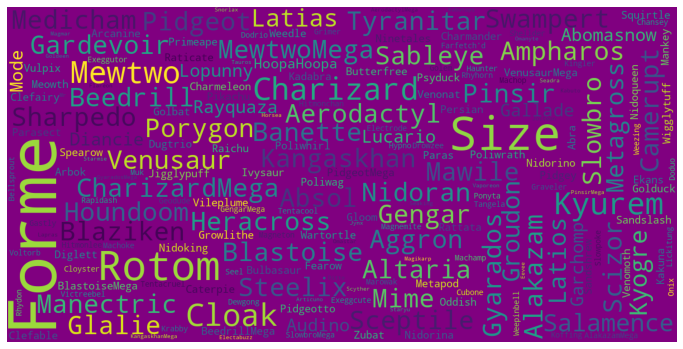

In [344]:
#Word Cloud for pokemon names
from wordcloud import  WordCloud
allwords = ' '.join([rl for rl in df['Name']])
wordcloud = WordCloud(width=1200, height=600, random_state=2, max_font_size=120, background_color='purple').generate(allwords)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We have some Null values on **Type 2** 

## **POKEMONS MAIN CLASS**

Let's observe the main type of the Pokemons

Text(0.5, 1.0, 'POKEMON TYPE COUNTPLOT')

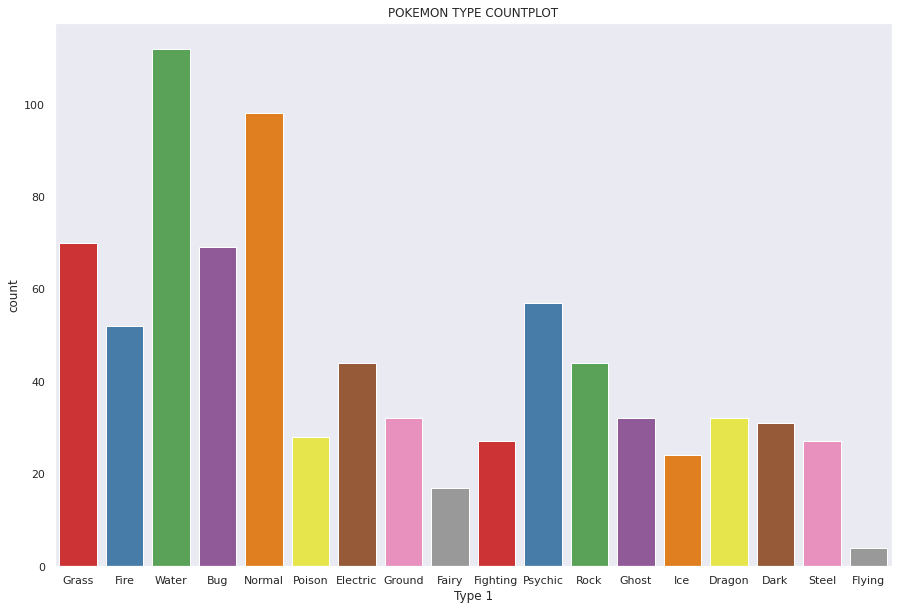

In [345]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Type 1',palette='Set1')
plt.title('POKEMON TYPE COUNTPLOT')

the **top 3** types of pokemon in the dataset are:

-**Water**

-**Normal**

-**Water**

## **Top 10 of  Pokemons with the higher stats**

Let's see which are the 10 strongest pokemon that appear in the dataset

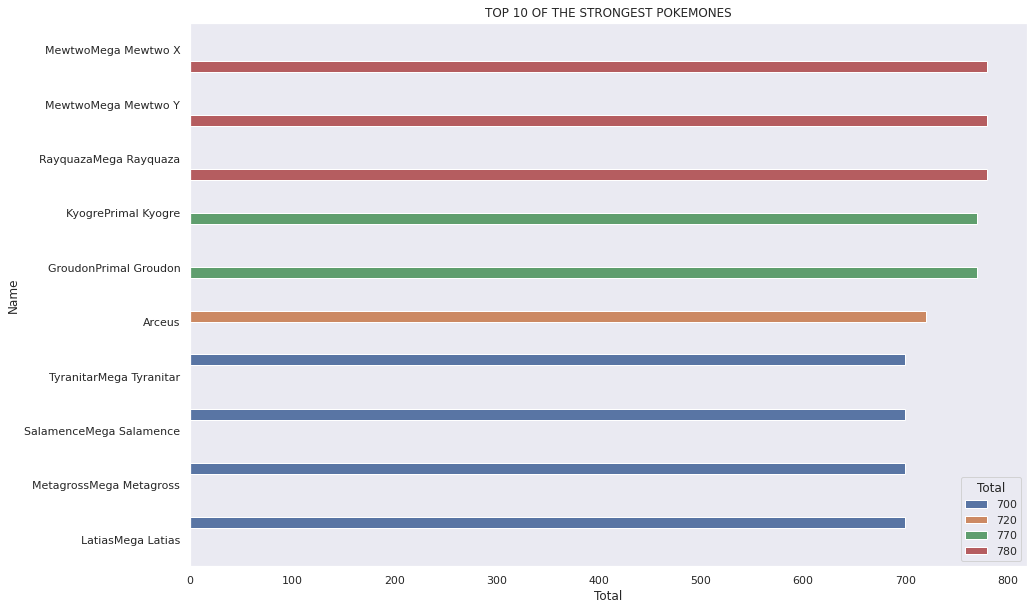

In [346]:

strongest = df.nlargest(10,['Total'])
plt.figure(figsize=(15,10))
plt.title('TOP 10 OF THE STRONGEST POKEMONES')
ax = sns.barplot(x="Total", y="Name",data=strongest,hue='Total')

THE **3** STRONGEST POKEMONS ARE:

-MewTwoMega Mewtwo X

-MewTwoMega Mewtwo Y

-RayquazaMega Rayquaza

**now we want to know which of these 10 pokemon are legendary or not**

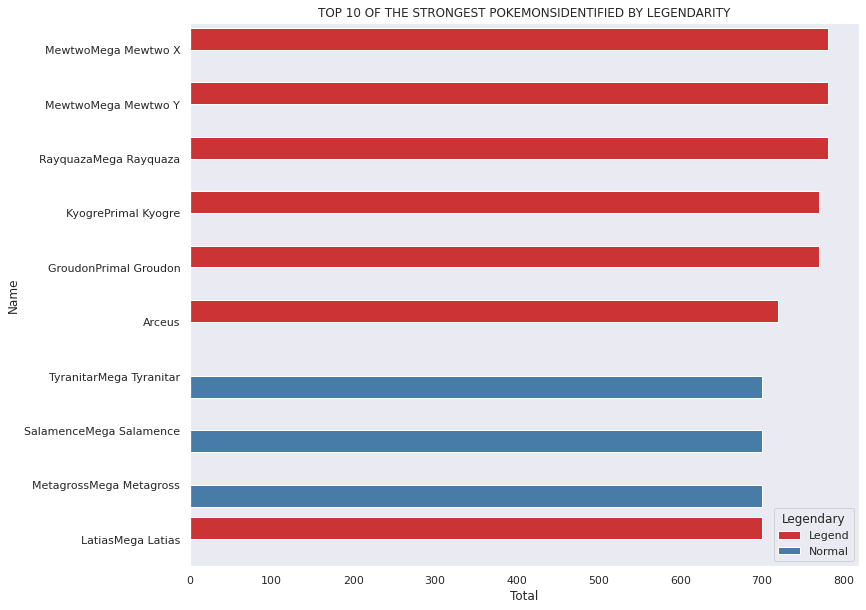

In [347]:
plt.figure(figsize=(12,10))
plt.title('TOP 10 OF THE STRONGEST POKEMONSIDENTIFIED BY LEGENDARITY')
ax = sns.barplot(x="Total", y="Name",hue='Legendary',data=strongest,palette='Set1')


## **Top 10 the Pokemons with the Lowest Stats**

let`s see whiche are the weakest pokemon in our dataset

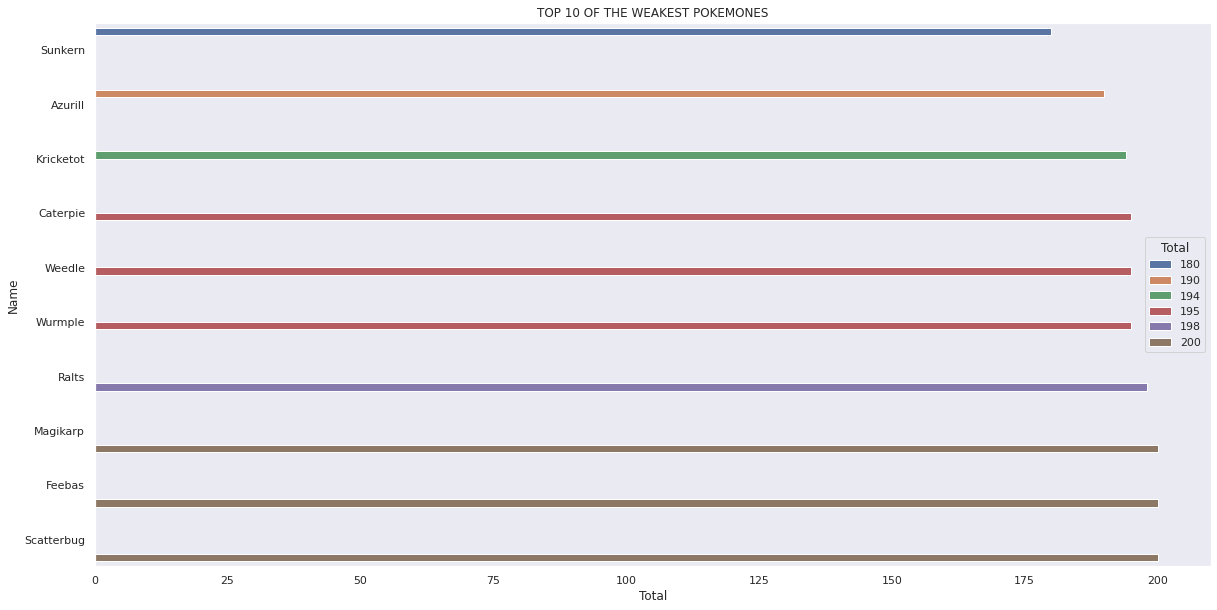

In [348]:
weakest = df.nsmallest(10,['Total'])
plt.figure(figsize=(20,10))
plt.title('TOP 10 OF THE WEAKEST POKEMONES')
ax = sns.barplot(x="Total", y="Name",hue='Total', data=weakest)

## **Top 10 pokemons with highest HP** 
hit points, or health, defines how much damage a pokemon can withstand before fainting

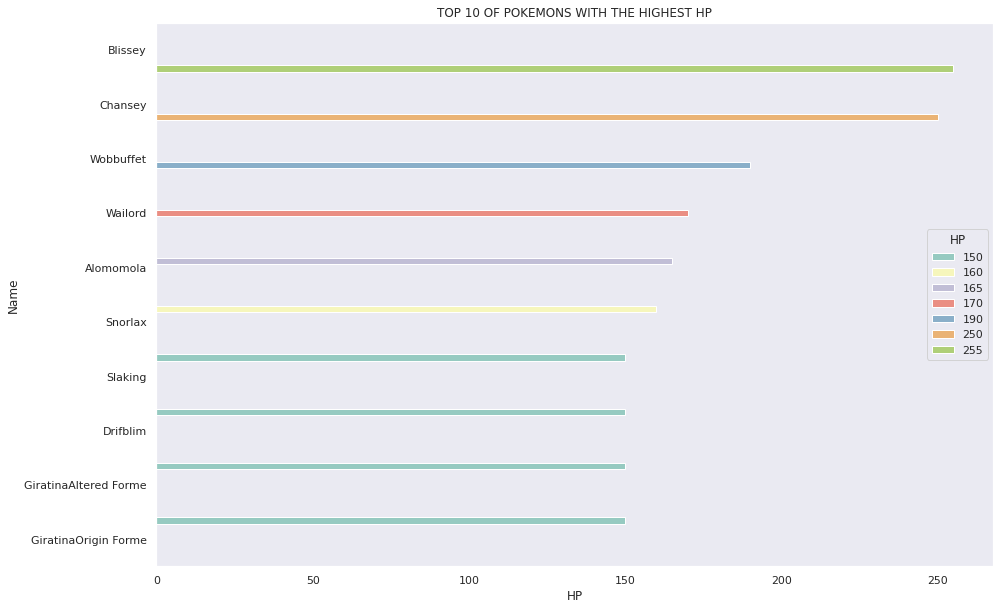

In [349]:
hp_strong = df.nlargest(10,['HP'])
plt.figure(figsize=(15,10))
plt.title('TOP 10 OF POKEMONS WITH THE HIGHEST HP')
ax = sns.barplot(x="HP", y="Name",data=hp_strong, hue='HP',palette='Set3')

## **Top 10 Pokemons with Lowest HP**

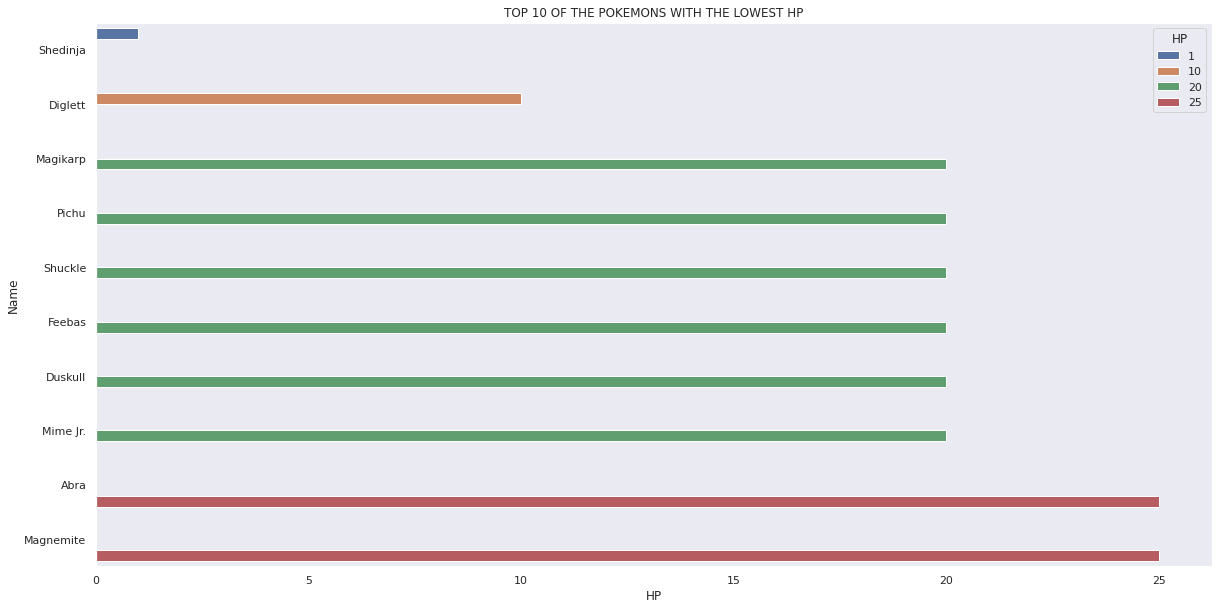

In [350]:
weakest_hp = df.nsmallest(10,['HP'])
plt.figure(figsize=(20,10))
plt.title('TOP 10 OF THE POKEMONS WITH THE LOWEST HP')
ax = sns.barplot(x="HP", y="Name",hue='HP', data=weakest_hp)

## **POKEMON STATS PER TYPE**
Let`s check how many Legendary pokemons exist on this dataset

In [351]:
list_types=df['Type 1'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically

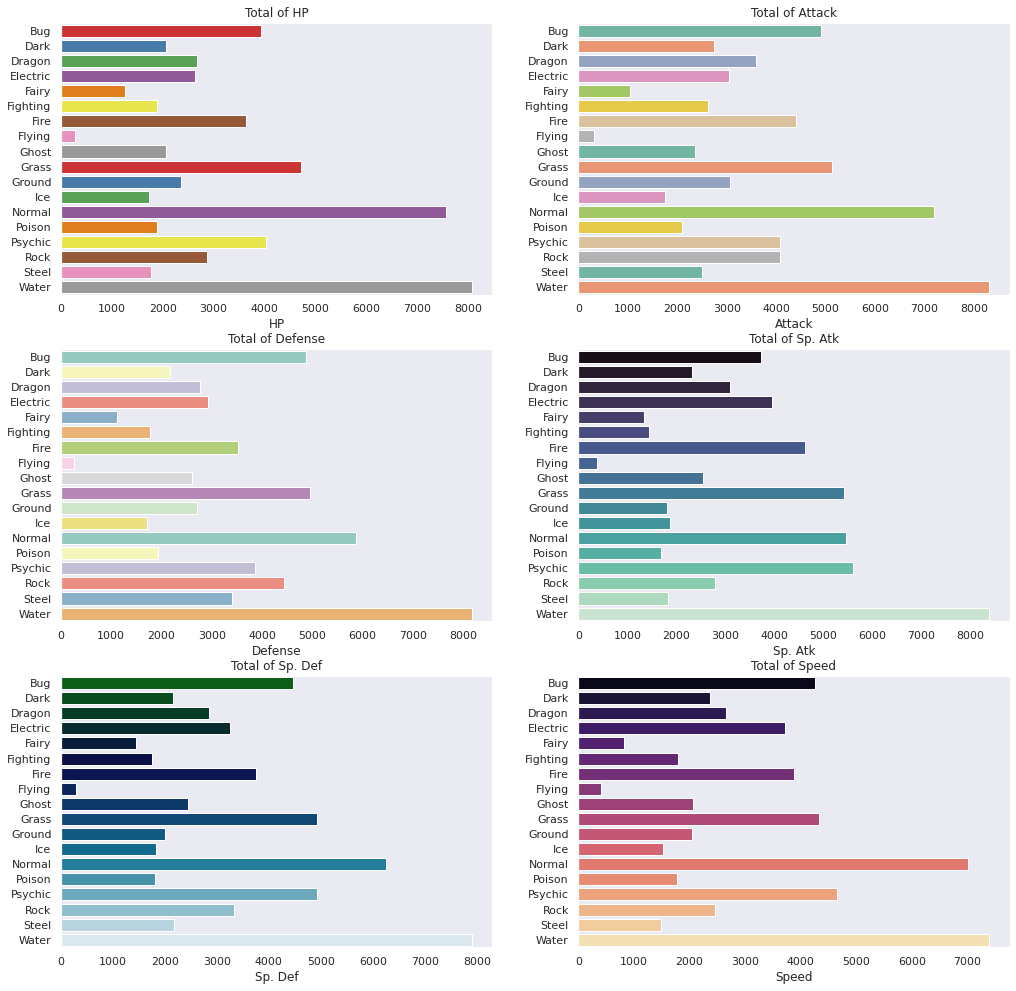

In [352]:
#Lets check Stats per Type of pokemon
stats=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
k=1
m=0
palette=['Set1','Set2','Set3','mako','ocean','magma']
plt.figure(figsize=(17,17))
for i in stats:
    plt.subplot(3,2,k)
    k=k+1
    sns.barplot(x=df.groupby('Type 1').sum()[i],y=list_types,palette=palette[m])
    m=m+1
    plt.title(str('Total of '+i))

## **GROUPING POKEMONS BY GENERATION**

Let`s see the distribution of the pokemon Generations

Text(0, 0.5, 'Number of pokemons')

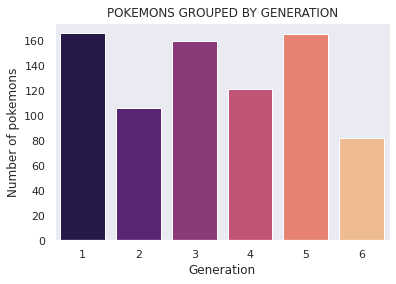

In [353]:
sns.countplot(x='Generation',data=df,palette='magma')
plt.title('POKEMONS GROUPED BY GENERATION')
plt.ylabel('Number of pokemons')

# **TREND PER STATS**

In [354]:
#Grouping some stats by generation
tendencies = df
total_tendencie = df[['Total', 'Generation']] 
total_hp = df[['HP','Generation']]
total_attack = df[['Attack','Generation']]
total_defense = df[['Defense','Generation']]
sp_atk = df[['Sp. Atk','Generation']]
sp_def = df[['Sp. Def','Generation']]
speed = df[['Speed','Generation']]

In [355]:
#Grouping by stats
total_generation = total_tendencie.groupby('Generation').sum()
hp_tendencie = total_hp.groupby('Generation').sum()
attack_tendencie = total_attack.groupby('Generation').sum()
defense_tendencie = total_defense.groupby('Generation').sum()
spatk_tendencie = sp_atk.groupby('Generation').sum()
spdef_tendencie = sp_def.groupby('Generation').sum()
speed_tendencie = speed.groupby('Generation').sum()

### **Statistical Trends by Generation**

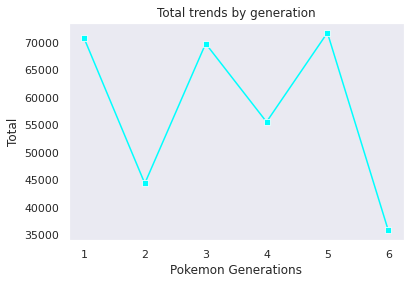

In [356]:
plt.title('Total trends by generation')
sns.lineplot(y='Total',x=total_generation.index, data=total_generation,marker='s', dashes=False,color='cyan')
plt.xlabel('Pokemon Generations')
plt.show()



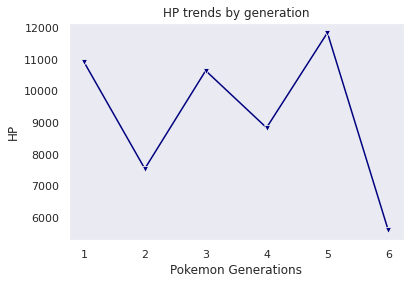

In [357]:
plt.title('HP trends by generation')
sns.lineplot(y='HP',x=hp_tendencie.index, data=hp_tendencie, marker='v',color='navy')
plt.xlabel('Pokemon Generations')
plt.show()

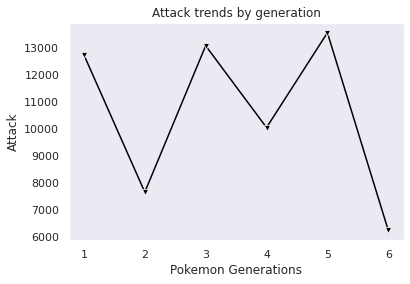

In [358]:
plt.title('Attack trends by generation')
sns.lineplot(y='Attack',x=attack_tendencie.index, data=attack_tendencie, marker='v',color='black')
plt.xlabel('Pokemon Generations')
plt.show()

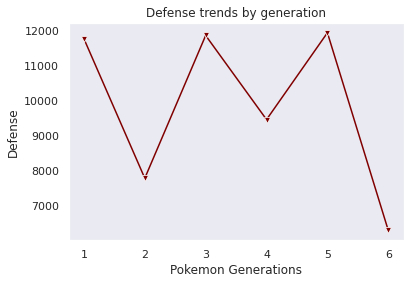

In [359]:
plt.title('Defense trends by generation')
sns.lineplot(y='Defense',x=defense_tendencie.index, data=defense_tendencie, marker='v',color='maroon')
plt.xlabel('Pokemon Generations')
plt.show()

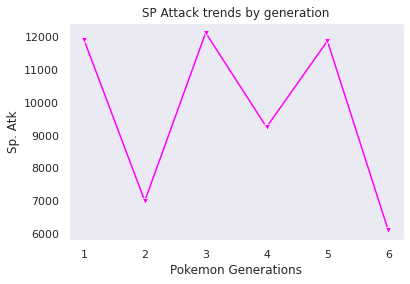

In [360]:
plt.title('SP Attack trends by generation')
sns.lineplot(y='Sp. Atk',x=spatk_tendencie.index, data=spatk_tendencie, marker='v',color='magenta')
plt.xlabel('Pokemon Generations')
plt.show()

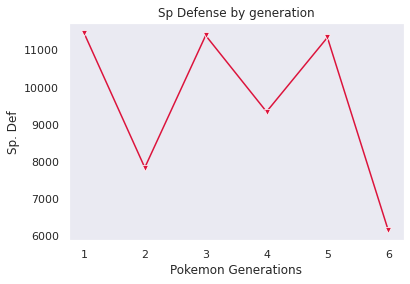

In [402]:
plt.title('Sp Defense by generation')
sns.lineplot(y='Sp. Def',x=spdef_tendencie.index, data=spdef_tendencie, marker='v',color='crimson')
plt.xlabel('Pokemon Generations')
plt.show()

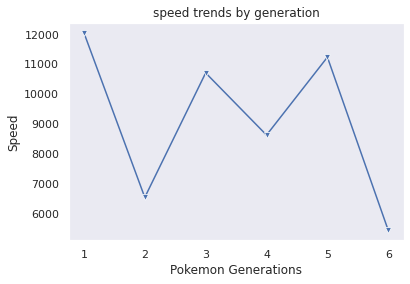

In [362]:
plt.title('speed trends by generation')
sns.lineplot(y='Speed',x=speed_tendencie.index, data=speed_tendencie, marker='v')
plt.xlabel('Pokemon Generations')
plt.show()

## **PAIR PLOT**

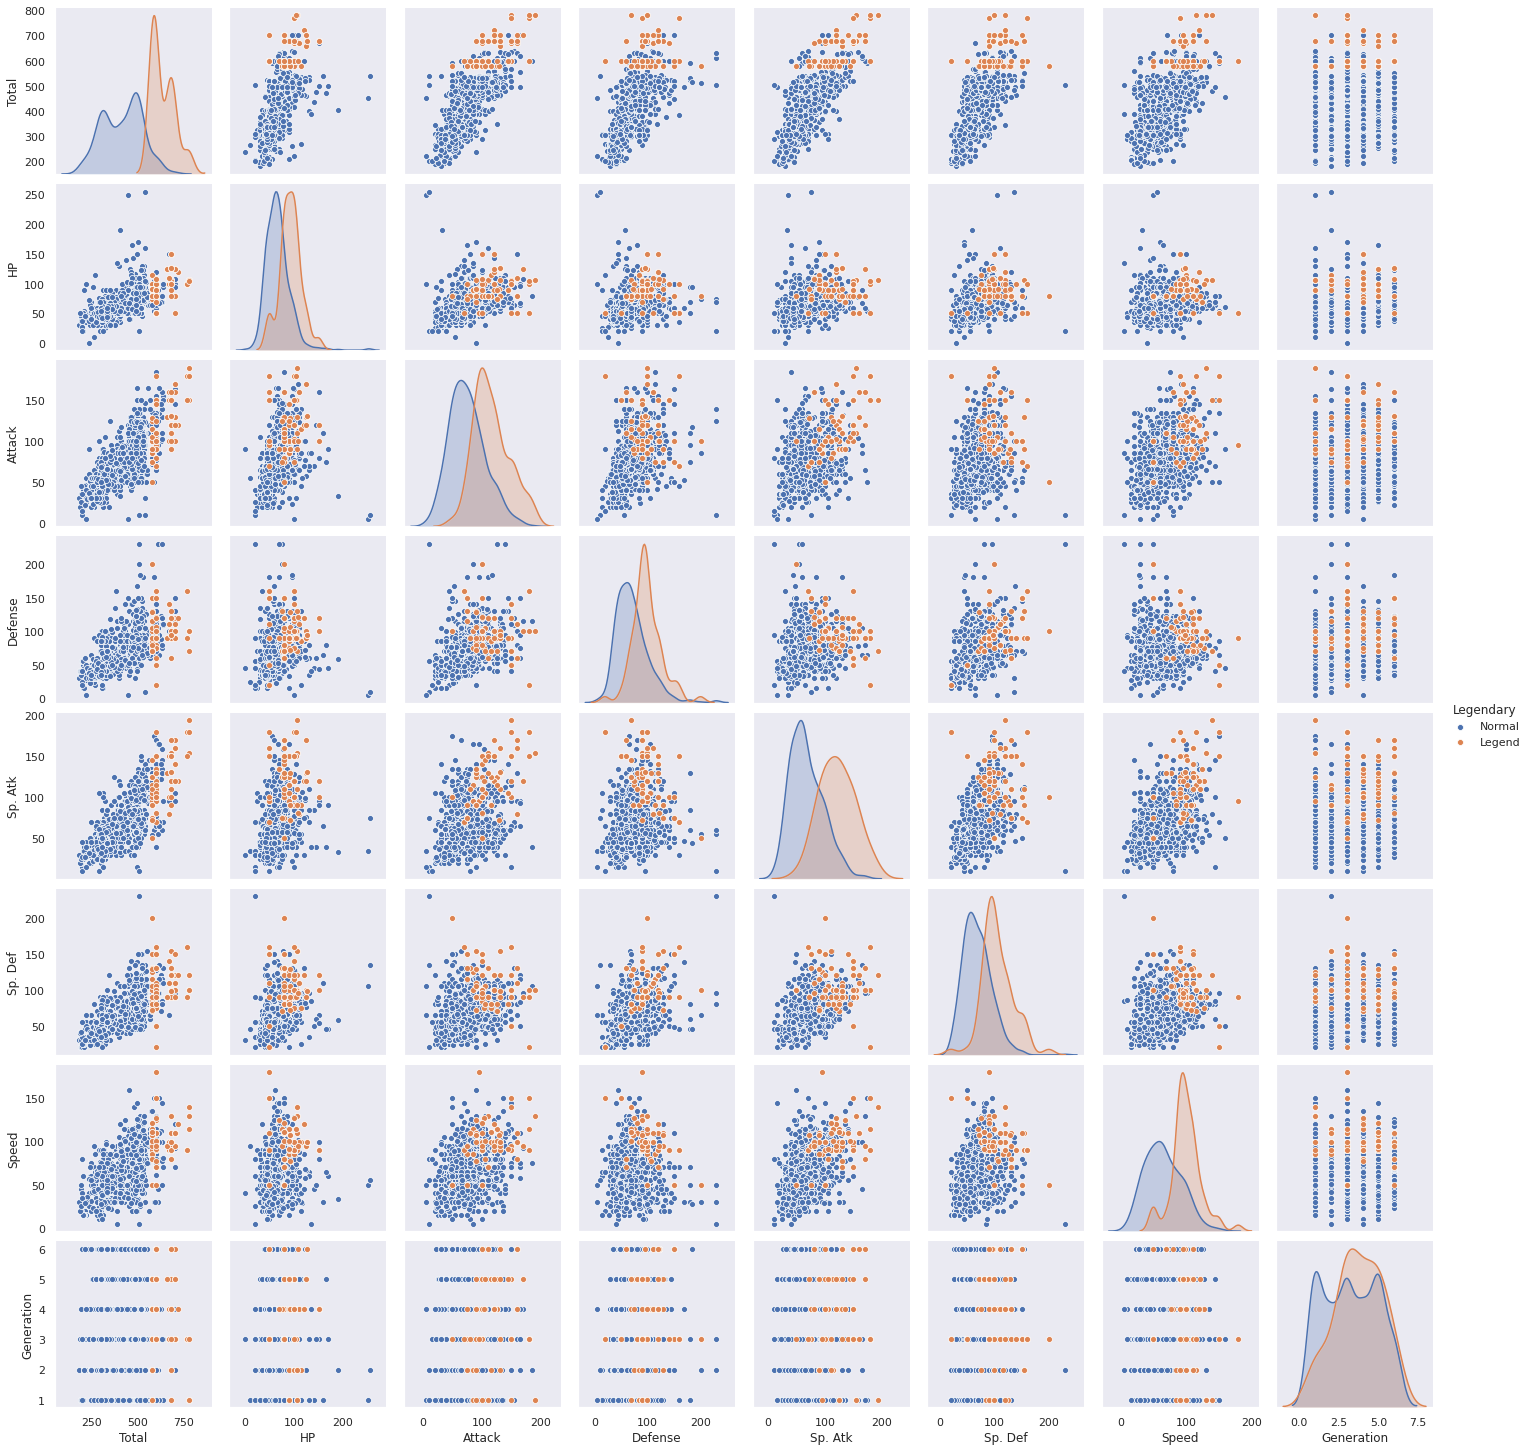

In [363]:
sns.pairplot(df,hue='Legendary')

## **CLASSIFICATION WITH SUPERVISED MACHINE LEARNING**

### **K-NEAREST NEIGHBORS (KNN)**

In [364]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [365]:
#Creating dataframe with attributes
attributes = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]

In [366]:
#Creando un dataset eliminando la columna target.
X = attributes.iloc[:, 0:5]
Y = attributes.iloc[:,-1]

In [367]:
#K-Nearest Neighbor
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 1)

In [368]:
#Normalizing values 
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [369]:
## 28 was selected as the neighbors since is the square root of 800
knnmodel= KNeighborsClassifier(n_neighbors=28)
knnmodel.fit(X_train,y_train)
y_predict1 = knnmodel.predict(X_test)

#### **PREDICTIONS AND EVALUATIONS**

In [370]:
acc = accuracy_score(y_test, y_predict1)
print(f'Accuracy for the Test set: {acc}')

Accuracy for the Test set: 0.925


In [371]:
#veremos reporte de clasificación
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

      Legend       0.50      0.17      0.25        12
      Normal       0.94      0.99      0.96       148

    accuracy                           0.93       160
   macro avg       0.72      0.58      0.61       160
weighted avg       0.90      0.93      0.91       160



In [372]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_predict1)
cm

array([[  2,  10],
       [  2, 146]])

#### **CHOOSING THE K-VALUE**

In [373]:
from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 29)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predict1))

print(scores)

[0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925]


Text(0, 0.5, 'Testing Accuracy')

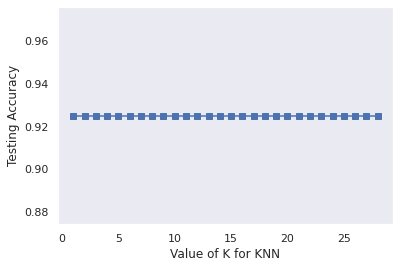

In [374]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores,marker='s')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### **LOGISTIC REGRESSION**

In [375]:
from sklearn.linear_model import LogisticRegression


In [376]:
#Taking attributes to fit the Algorithm
X_lr = attributes.iloc[:, :5]
Y_r = attributes.iloc[:,-1]

In [377]:
#Train and test split
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr,Y_r, test_size=0.2, random_state = 1)

In [378]:
#Normalizing values 
x_train_lr = preprocessing.StandardScaler().fit_transform(x_train_lr)
x_test_lr = preprocessing.StandardScaler().fit_transform(x_test_lr)

In [379]:
clf = LogisticRegression(random_state=0).fit(x_train_lr, y_train_lr)
#Buscando accuracy de model
y_pred_lr = clf.predict(x_test_lr)
lr_acc = accuracy_score(y_test_lr, y_pred_lr)
print(f'EL accuracy para el algorimto de Logistic Regression es de:{lr_acc}')


EL accuracy para el algorimto de Logistic Regression es de:0.925


In [380]:
#Veamos otras metricas para nuestro modelo
print(classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

      Legend       0.50      0.25      0.33        12
      Normal       0.94      0.98      0.96       148

    accuracy                           0.93       160
   macro avg       0.72      0.61      0.65       160
weighted avg       0.91      0.93      0.91       160



## **CLASSIFICATION WITH SUPERVISED MACHINE LEARNING**


### **K-means**

In [381]:
#Using again the Attributes Dataset
x_k = attributes.iloc[:, 0:5]
y_kmean = attributes.iloc[:,-1]


In [382]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(x_k)
x_k = scalar.transform(x_kmean)
R = x_k

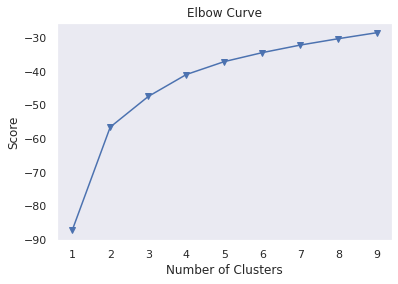

<Figure size 576x432 with 0 Axes>

In [383]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(R).score(R) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='v')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.figure(figsize=(8,6))
plt.show()

In [384]:
#Using two clusters as elbow suggested
kmeans = KMeans(n_clusters=2).fit(R)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.21946831 0.28692329 0.22551066 0.2372365  0.16542809]
 [0.31702658 0.51085095 0.38482948 0.44352669 0.32726308]]


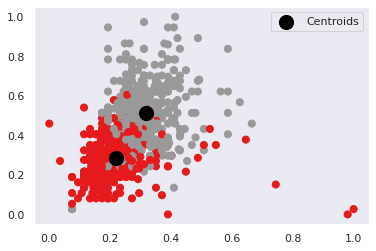

In [385]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=5, random_state=0)
pred_y = kmeans.fit_predict(R)
plt.scatter(R[:,0], R[:,1], c=pred_y, s=50,cmap='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',label='Centroids')
plt.legend()
plt.show()

In [386]:
#Creating a function to normalize values
def normalizing_legend(value):
  if value == 'Legend':
    return 0
  elif value =='Normal':
    return 1

In [387]:
#Creating values normalized with 0 and 1
y_kk = y_kmean.apply(normalizing_legend)

In [388]:

#Predicted Labels
k_means_predicted_labels = kmeans.labels_
#Confusion Matrix
cmk= confusion_matrix(y_kk,k_means_predicted_labels)

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Legend')]

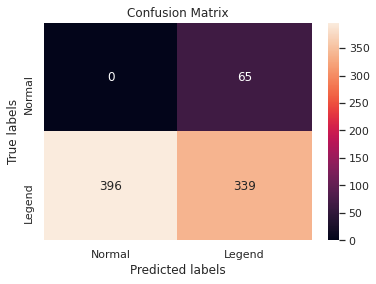

In [389]:
ax= plt.subplot()
sns.heatmap(cmk, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Legend']); ax.yaxis.set_ticklabels(['Normal', 'Legend'])

In [390]:
k_means_accuracy = accuracy_score(y_kk,k_means_predicted_labels)
print('Accuracy of the model with K-means is: ',k_means_accuracy)

Accuracy of the model with K-means is:  0.42375


In [391]:
print(classification_report(y_kk, k_means_predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.84      0.46      0.60       735

    accuracy                           0.42       800
   macro avg       0.42      0.23      0.30       800
weighted avg       0.77      0.42      0.55       800



### **HIERARCHICHAL CLUSTERING**

In [392]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

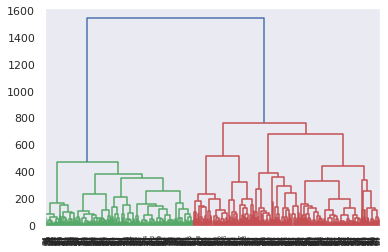

In [393]:
X_hierarchichal = attributes.iloc[:,:5]
dendrogram = sch.dendrogram(sch.linkage(X_hierarchichal, method='ward'))

In [394]:
#Creating Model
model_h = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_h.fit(X_hierarchichal)
labels = model_h.labels_

In [395]:
y_hiera = y_kk
#Confusion Matrix
cmh= confusion_matrix(y_hiera,labels)

[Text(0, 0.5, 'Democrats'), Text(0, 1.5, 'Neutral')]

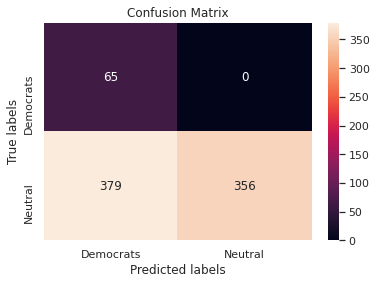

In [396]:

ax= plt.subplot()
sns.heatmap(cmh, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Democrats', 'Neutral','Republicans','not identified']); ax.yaxis.set_ticklabels(['Democrats', 'Neutral','Republicans','not identified'])

In [397]:
accuracy_score(y_hiera,labels)

0.52625

In [398]:
print(classification_report(y_hiera, labels))

              precision    recall  f1-score   support

           0       0.15      1.00      0.26        65
           1       1.00      0.48      0.65       735

    accuracy                           0.53       800
   macro avg       0.57      0.74      0.45       800
weighted avg       0.93      0.53      0.62       800



### **Principal Component Analysis**

In [399]:
#matching normalized values
X2 = R

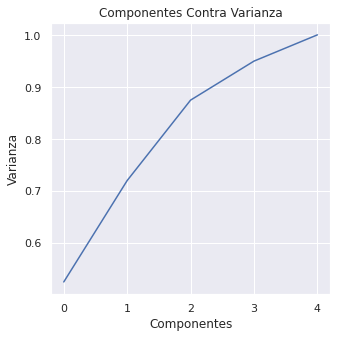

In [400]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca_x = pca.fit_transform(X2)
#Chosing Elements depending on the Variance of the Elements
plt.figure(figsize=(5,5))
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.title('Componentes Contra Varianza')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()